In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [139]:
path = '../../output/weights/p_date=2022-11-24-12_53_40/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

20001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [140]:
slice = 200000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [141]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

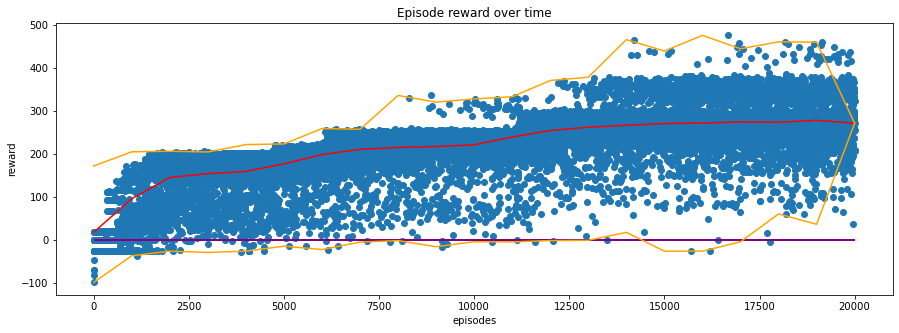

Maximum: 475.07076427218306
Average: 209.4636994089767

Values: 17.2 > 95.1 > 144.6 > 153.4 > 158.6 > 176.3 > 197.8 > 209.9 > 214.3 > 216.5 > 220.4 > 238.8 > 253.7 > 261.5 > 266.0 > 269.9 > 271.2 > 273.8 > 272.9 > 277.5 > 270.7

Minimum (last 1000): -99.6874505618361
Average (last 1000): 205.87923551257197
Maximum (last 1000): 475.07076427218306


In [142]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

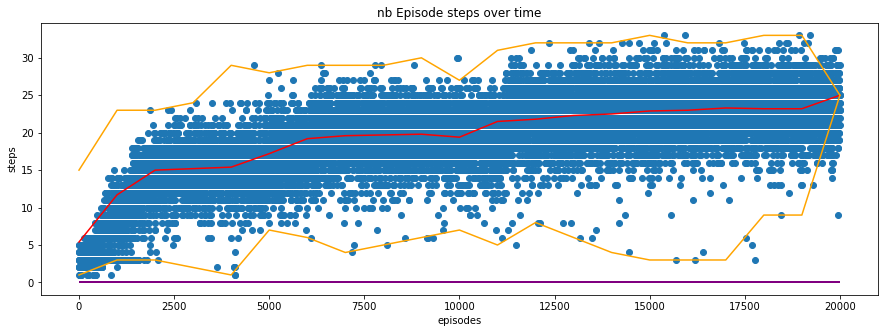

Maximum: 33
Average: 19.064296785160742

Values: 5.4 > 11.7 > 15.0 > 15.2 > 15.4 > 17.2 > 19.2 > 19.6 > 19.7 > 19.8 > 19.4 > 21.5 > 21.8 > 22.3 > 22.5 > 22.9 > 23.0 > 23.3 > 23.2 > 23.2 > 25

Minimum (last 1000): 1
Average (last 1000): 18.84890268933214
Maximum (last 1000): 33


In [143]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

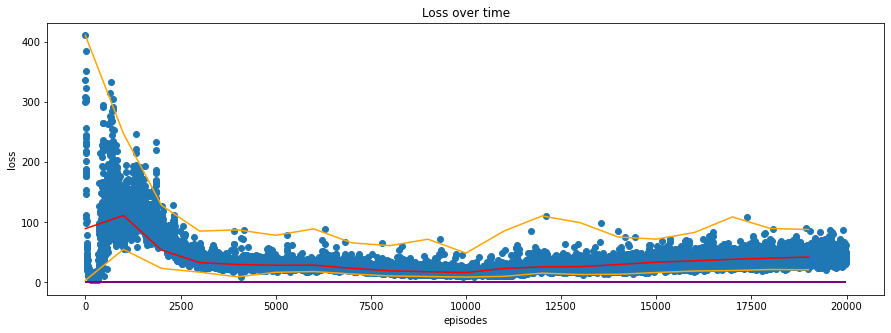

Maximum: 410.8345031738281
Average: 37.39783026009033

Values: 89.5 > 111.3 > 53.8 > 33.0 > 29.8 > 28.6 > 28.7 > 23.6 > 19.4 > 17.8 > 16.4 > 23.3 > 25.9 > 26.2 > 29.8 > 33.7 > 35.9 > 38.5 > 40.4 > 42.3

Minimum (last 1000): 3.4786536693573
Average (last 1000): 37.14162652198658
Maximum (last 1000): 410.8345031738281


In [144]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

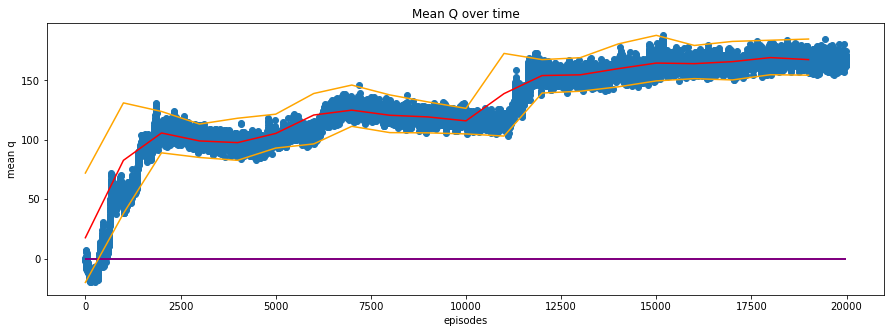

Maximum: 187.77096557617188
Average: 127.34237616296056

Values: 17.6 > 82.7 > 105.7 > 99.0 > 97.6 > 105.3 > 120.8 > 124.9 > 120.6 > 119.2 > 115.9 > 138.8 > 154.0 > 154.6 > 159.8 > 164.5 > 164.0 > 165.7 > 169.1 > 167.4

Minimum (last 1000): -19.999408721923828
Average (last 1000): 125.23466045541817
Maximum (last 1000): 187.77096557617188


In [145]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

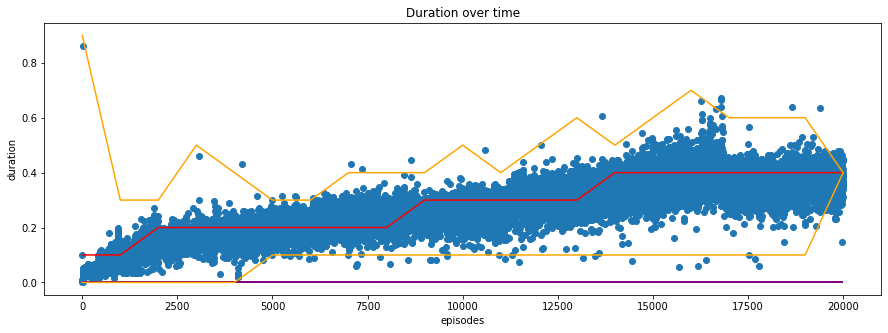

Maximum: 0.8598182000000003
Average: 0.26194235617219164

Values: 0.1 > 0.1 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4

Minimum (last 1000): 0.002279800000000165
Average (last 1000): 0.256495207020683
Maximum (last 1000): 0.8598182000000003


In [146]:
plot(duration, "Duration over time", "episodes", "duration")